 **Iris Flower Classification**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
data = pd.read_csv("iris flower file.csv")

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

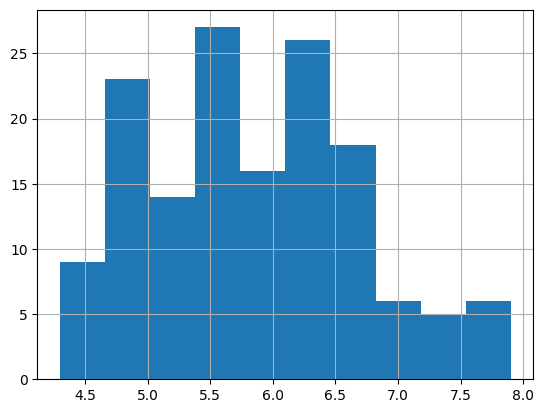

In [ ]:
data['sepal_length'].hist()

<Axes: >

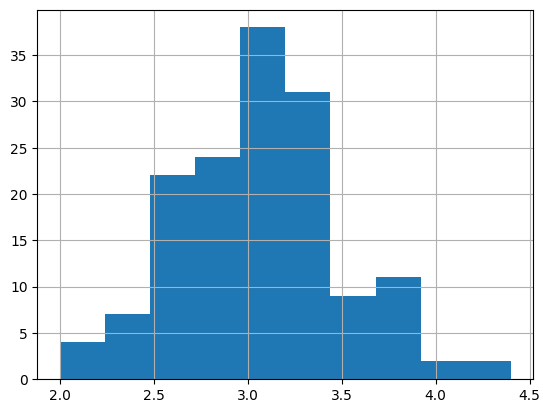

In [ ]:
data['sepal_width'].hist()

In [ ]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
data.replace({"species": {"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}}, inplace=True)

<Axes: >

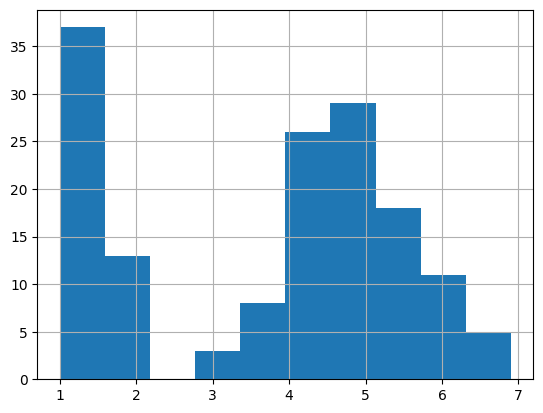

In [ ]:
data['petal_length'].hist()

<Axes: >

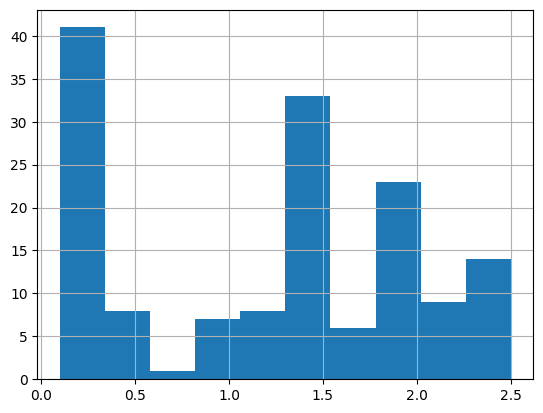

In [ ]:
data['petal_width'].hist()

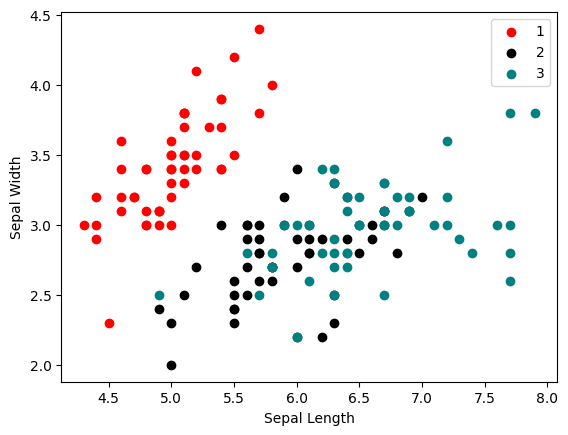

In [ ]:
colors=['red','Black','teal']
species=[1, 2, 3]
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

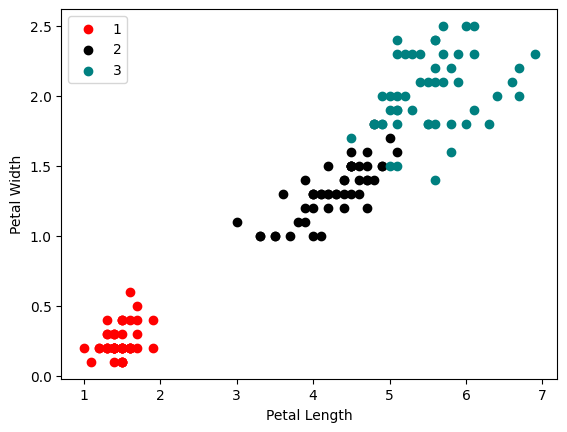

In [ ]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

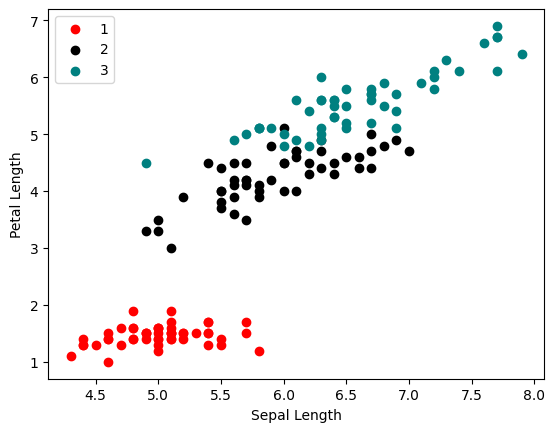

In [ ]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

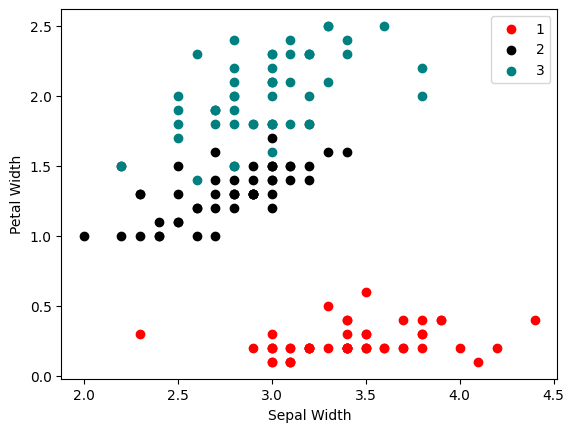

In [ ]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

<Axes: >

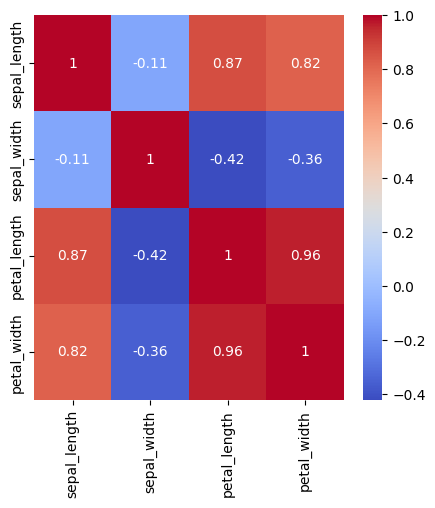

In [ ]:
numeric_columns=data.drop(columns='species')
corr=numeric_columns.corr()
fig,axis=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=axis,cmap='coolwarm')

In [ ]:
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])
data.head(16)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
x = data.drop('species', axis=1)
y = data[['species']]
print(x.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   species
0        0
1        0
2        0
3        0
4        0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
LR=LogisticRegression()
LR.fit(x_train,y_train)
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

RandomForestClassifier()

In [ ]:
LR_accuracy=LR.score(x_test,y_test)*100
KNN_accuracy=KNN.score(x_test,y_test)*100
DT_accuracy=DT.score(x_test,y_test)*100
RFC_accuracy=RFC.score(x_test,y_test)*100
print(f"Accuracy by using Logistic Regression: {LR_accuracy}%")
print(f"Accuracy by using K Nearest Neighbors Algorithm: {KNN_accuracy}%")
print(f"Accuracy by using Decision Tree Classifier: {DT_accuracy}%")
print(f"Accuracy by using Random Forest Classifier: {RFC_accuracy}%")

Accuracy by using Logistic Regression: 100.0%
Accuracy by using K Nearest Neighbors Algorithm: 100.0%
Accuracy by using Decision Tree Classifier: 100.0%
Accuracy by using Random Forest Classifier: 97.77777777777777%
